# Explanaible AI - ICE - Individual Conditional Expectation - sklearn
Sklean offer a a method to calculate **ICE - Individual Conditional Expectation Plot**. In codes and sklearn documentation ICE is generated using the same fuctions used to generated PDPs.

#### Link sklearn:
- Documentation code: https://scikit-learn.org/stable/modules/generated/sklearn.inspection.partial_dependence.html#sklearn.inspection.partial_dependence
- User Guide: https://scikit-learn.org/stable/modules/partial_dependence.html#partial-dependence
- Codes examples: https://scikit-learn.org/stable/auto_examples/inspection/plot_partial_dependence.html#sphx-glr-auto-examples-inspection-plot-partial-dependence-py


#### Link sklearn:
Documentation code
- partial depedence: https://scikit-learn.org/stable/modules/generated/sklearn.inspection.partial_dependence.html#sklearn.inspection.partial_dependence
- partial dependence plot: https://scikit-learn.org/stable/modules/generated/sklearn.inspection.PartialDependenceDisplay.html#sklearn.inspection.PartialDependenceDisplay
- partial dependence plot from estimator: https://scikit-learn.org/stable/modules/generated/sklearn.inspection.PartialDependenceDisplay.html#sklearn.inspection.PartialDependenceDisplay.from_estimator

User guide:
- unique: https://scikit-learn.org/stable/modules/partial_dependence.html#partial-dependence

Codes examples:
- partial depende: https://scikit-learn.org/stable/auto_examples/inspection/plot_partial_dependence.html#sphx-glr-auto-examples-inspection-plot-partial-dependence-py
- partial dependence plot: https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_partial_dependence_visualization_api.html#sphx-glr-auto-examples-miscellaneous-plot-partial-dependence-visualization-api-py
- partial dependence plot from estimator:

**Qué es PDP/ICE**

Se pueden utilizar gráficos de dependencia parcial (PDP) y gráficos de expectativas condicionales individuales (ICE) para visualizar y analizar la interacción entre la respuesta objetivo [1] y un conjunto de características de entrada de interés.

Tanto los PDP [H2009] como los ICE [G2015] suponen que las características de entrada de interés son independientes de las características del complemento, y este supuesto a menudo se viola en la práctica. Por lo tanto, en el caso de características correlacionadas, crearemos puntos de datos absurdos para calcular el PDP/ICE [M2019]

**ICE**

Similar to a PDP, an individual conditional expectation (ICE) plot shows the dependence between the target function and an input feature of interest. However, unlike a PDP, which shows the average effect of the input feature, an ICE plot visualizes the dependence of the prediction on a feature for each sample separately with one line per sample. Due to the limits of human perception, only one input feature of interest is supported for ICE plots.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import sklearn

import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px

# data
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LinearRegression # lr
from sklearn.linear_model import Ridge # ridge
from sklearn.linear_model import Lasso # lasso
from sklearn.tree import DecisionTreeRegressor # tree
from sklearn.ensemble import GradientBoostingRegressor #gb
from sklearn.ensemble import RandomForestRegressor #rf
from xgboost import XGBRegressor # xgb
from  sklearn.neural_network import MLPRegressor # mlp

### 1. Load data

In [2]:
##### load data
data_X, data_y = fetch_california_housing(return_X_y=True, as_frame=True)

##### joinn and rename dataset
data = data_X.copy()
data['Price'] = data_y

##### dropduplicates - some kind of plots in plotly return error with duplicated values
data = data.drop_duplicates()

##### delete outliers
percentil_lower = data.quantile(0.01)
percentil_upper = data.quantile(0.99)

data_raw = data[(data >= percentil_lower) & (data <= percentil_upper)]
data_raw.dropna(inplace = True)


##### split into train/test
target = 'Price'
list_features = list(set(data_raw.columns) - set([target]))

X_train, X_test, y_train, y_test = train_test_split(data_raw[list_features], 
                                                    data_raw[[target]], 
                                                    test_size = 0.2, 
                                                    random_state=42
                                                   )

In [3]:
list_features

['AveRooms',
 'MedInc',
 'Longitude',
 'Population',
 'Latitude',
 'AveBedrms',
 'AveOccup',
 'HouseAge']

In [4]:
X_train.head()

,AveRooms,MedInc,Longitude,Population,Latitude,AveBedrms,AveOccup,HouseAge
5712,4.641509,4.1523,-118.24,926.0,34.22,1.094340,2.495957,34.0
15731,3.771250,3.3882,-122.44,1588.0,37.78,1.063750,1.985000,52.0
2894,4.135135,1.7292,-118.99,743.0,35.37,0.990991,3.346847,38.0
3333,4.770642,1.8417,-122.62,249.0,38.92,1.055046,2.284404,13.0
8410,3.636364,2.3375,-118.35,2649.0,33.93,1.026738,4.721925,33.0


### 2. Train models

#### 2.1 Linear regression

In [5]:
# train lr
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [6]:
# r2 score
r2_lr_train = lr.score(X_train, y_train)
r2_lr_test = lr.score(X_test, y_test)

print('r2_train: ', r2_lr_train)
print('r2_test: ', r2_lr_test)

r2_train:  0.6811276939092024
r2_test:  0.6813140626891626


#### 2.2 Random Forest Simple

In [7]:
# train rf simple
param_n_trees = 3
rf_simple = RandomForestRegressor(n_estimators = param_n_trees,
                                  random_state = 42,
                                 min_samples_split = 0.2,
                                    min_samples_leaf = 0.1)
                                   #max_depth = 2)
rf_simple.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=0.1, min_samples_split=0.2,
                      n_estimators=3, random_state=42)

In [8]:
# r2 score
r2_rf_simple_train = rf_simple.score(X_train, y_train)
r2_rf_simple_test = rf_simple.score(X_test, y_test)

print('r2_train: ', r2_rf_simple_train)
print('r2_test: ', r2_rf_simple_test)

r2_train:  0.45686524868931044
r2_test:  0.43402741471810524


#### 2.3 Random Forest Default

In [9]:
# train rf default hiperparameters
rf_default = RandomForestRegressor(random_state = 42)
rf_default.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
# r2 score
r2_rf_default_train = rf_default.score(X_train, y_train)
r2_rf_default_test = rf_default.score(X_test, y_test)

print('r2_train: ', r2_rf_default_train)
print('r2_test: ', r2_rf_default_test)

r2_train:  0.9742374155693353
r2_test:  0.8100517124249736


### 3. ICE
Plot using the same function to plot pdp "PartialDependenceDisplay.from_estimator" but defining the arg **"kind = individual"**

In [13]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence

In [15]:
##########  define feature to plot ##########
feature_pdp = ['MedInc']
feature_pdp

['MedInc']

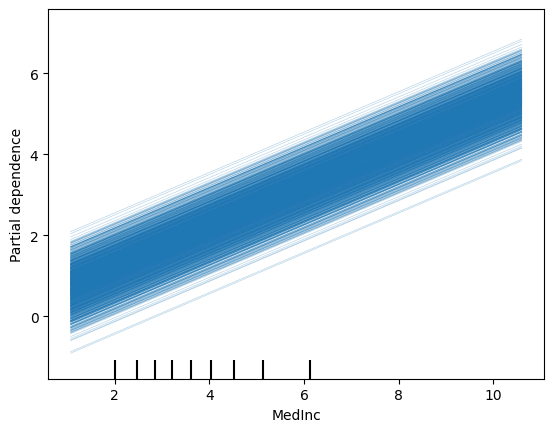

In [17]:
display = PartialDependenceDisplay.from_estimator(
    estimator = lr,
    X = X_train,
    features = feature_pdp, ## IMPORANT TO INDICATE WHICH FEATURE TO PLOT IT IS NECCESARY DEFINE IT IN A LIST. list of {int, str, pair of int, pair of str}
    n_cols = 3,  ## number of columns max in the subplot - plot PDP multiple features
    grid_resolution = 100, # The number of equally spaced points on the axes of the plots
    percentiles = (0, 1), # The lower and upper percentile used to create the extreme values for the PDP axes. default (0.05, 0.95)
    kind = 'individual'
)

### 4. ICE WITH PDP
Plot using the same function to plot pdp "PartialDependenceDisplay.from_estimator" but defining the arg **"kind = both"**

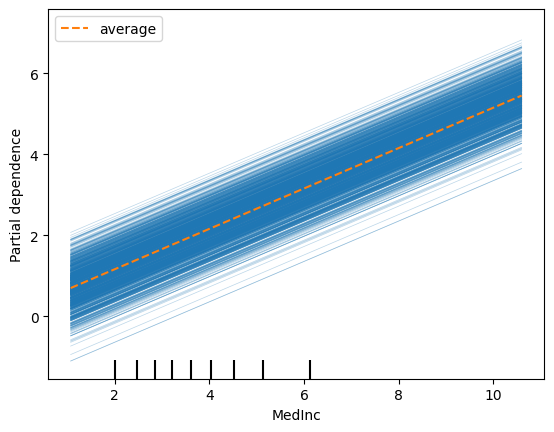

In [18]:
display = PartialDependenceDisplay.from_estimator(
    estimator = lr,
    X = X_train,
    features = feature_pdp,
    n_cols = 3,  
    grid_resolution = 100,
    percentiles = (0, 1), 
    kind = 'both'
)

### 5. ICE centered

If there are too many lines in an ICE plot, it can be difficult to see differences between individual samples and interpret the model. Centering the ICE at the first value on the x-axis, produces centered Individual Conditional Expectation (cICE) plots [G2015]. This puts emphasis on the divergence of individual conditional expectations from the mean line, thus making it easier to explore heterogeneous relationships. cICE plots can be plotted by setting centered=True

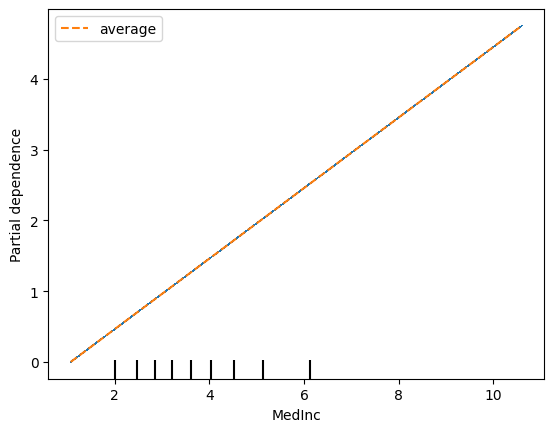

In [20]:
display = PartialDependenceDisplay.from_estimator(
    estimator = lr,
    X = X_train,
    features = feature_pdp,
    n_cols = 3,  
    grid_resolution = 100,
    percentiles = (0, 1), 
    kind = 'both',
    centered = True
)